In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
startup = pd.read_csv("startup_funding.csv")

In [3]:
startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [5]:
startup.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

In [6]:
startup.shape

(2372, 10)

There are 10 variables and 2372 observations

### Deleting Remarks from table and displaying remaining data 

In [7]:
del startup['Remarks']

In [8]:
startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


### Converting string AmountInusd to numeric

In [9]:
startup["AmountInUSD"] = startup["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
startup["AmountInUSD"] = pd.to_numeric(startup["AmountInUSD"])
startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


### Formating date to timeseries <br> Number of fundings per month
     

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201606     98
201508     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


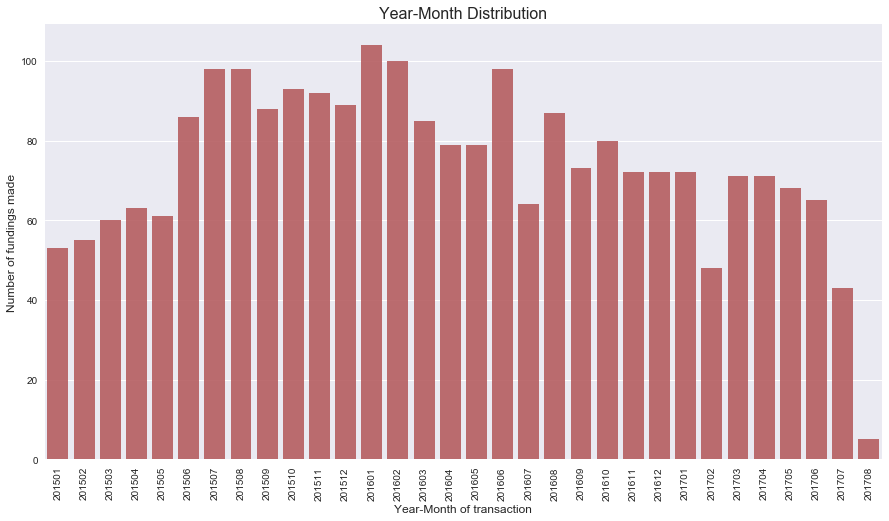

In [10]:
startup['Date'][startup['Date']=='12/05.2015'] = '12/05/2015'
startup['Date'][startup['Date']=='13/04.2015'] = '13/04/2015'
startup['Date'][startup['Date']=='15/01.2015'] = '15/01/2015'
startup['Date'][startup['Date']=='22/01//2015'] = '22/01/2015'
startup["yearmonth"] = (pd.to_datetime(startup['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(startup['Date'],format='%d/%m/%Y').dt.month)
temp = startup['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = startup['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9, color=color[2])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

### Maximum fund startup gets in India

In [11]:
print("Maximum funding to a Startups is : ",startup["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [12]:
startup[startup['AmountInUSD']==1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703


We can see that Flipkart and Paytm has highest funding

In [13]:
startup[startup.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,201503
2276,2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,201502


### Least funding startup gets in India

In [14]:
print("Minimum funding to a Startup is:",startup["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startup is: 16000.0


In [15]:
startup[startup["AmountInUSD"]==16000]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2345,2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2346,2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2347,2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2348,2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2349,2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


Hostel Dunia, Play your sport, yo Grad are some startup that has least amount of funding

### Average funding for startups

In [16]:
print("Average funding of a Startups in India is:",startup["AmountInUSD"].dropna().sort_values().mean())

Average funding of a Startups in India is: 12031073.099016393


### No of Startups in India

In [17]:
len(startup["StartupName"].unique())

2001

In [18]:
startup["StartupName"].count()

2372

In [19]:
startup["StartupName"].value_counts().head(20)

Swiggy           7
UrbanClap        6
NoBroker         5
Medinfi          5
Paytm            5
Jugnoo           5
Capital Float    4
Vyomo            4
Niki.ai          4
Voonik           4
Wooplr           4
Moglix           4
HolaChef         4
Ola Cabs         4
TinyStep         4
Byju’s           4
Tracxn           4
YepMe            4
Ola              4
Simplilearn      4
Name: StartupName, dtype: int64

In [20]:
startupname = startup['StartupName'].value_counts().head(20)

Total startups funded :  2001
Swiggy           7
UrbanClap        6
NoBroker         5
Medinfi          5
Paytm            5
Jugnoo           5
Capital Float    4
Vyomo            4
Niki.ai          4
Voonik           4
Name: StartupName, dtype: int64


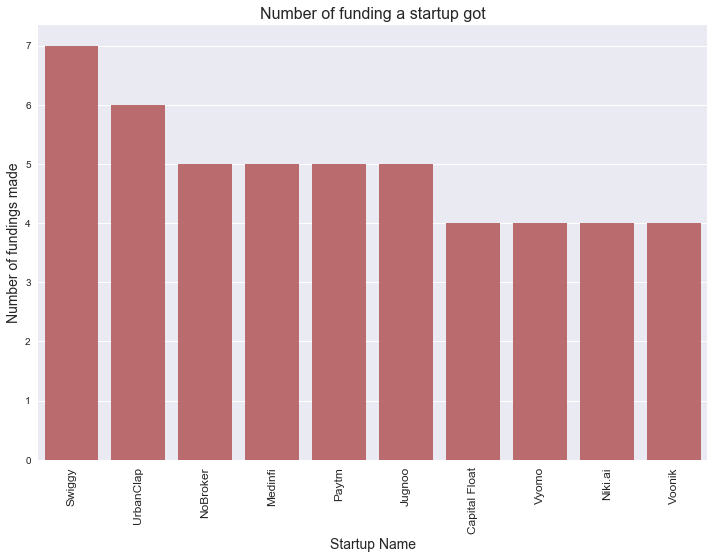

In [21]:
print("Total startups funded : ", len(startup["StartupName"].unique()))
print(startup["StartupName"].value_counts().head(10))
startupname = startup['StartupName'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[2])
plt.xticks(rotation='vertical',fontsize=12)
plt.xlabel('Startup Name', fontsize=14)
plt.ylabel('Number of fundings made', fontsize=14)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

As we can see that Swiggy got maximum number of fundings(Total funding = 7) and total there are 2001 indian startups funded from January 2015 to August 2017. The above visulization is only for Top 10 startups.

### Industries that are favoured by inverstors for funding <br> Which types of company gets more funding 

In [22]:
industry = startup["IndustryVertical"].value_counts().head(10)

In [23]:
industry

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64

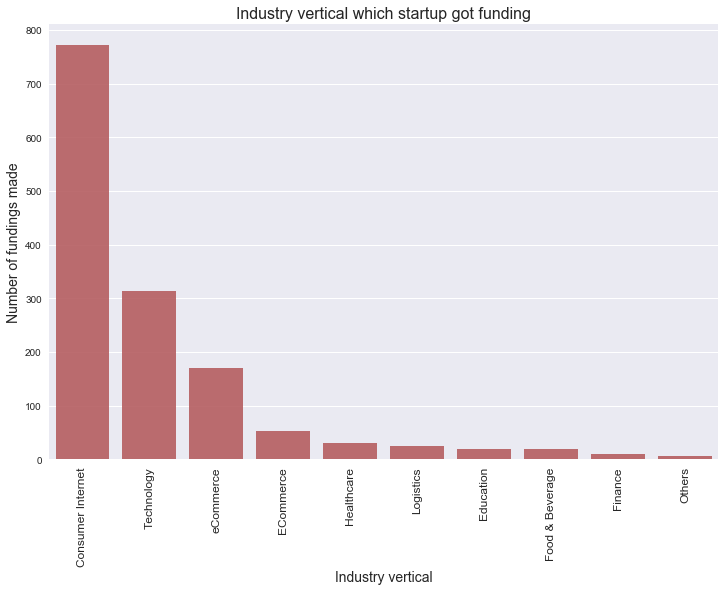

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x=industry.index,y=industry.values,color=color[2],alpha=0.9)
plt.xticks(rotation='vertical',fontsize=12)
plt.xlabel('Industry vertical', fontsize=14)
plt.ylabel('Number of fundings made', fontsize=14)
plt.title("Industry vertical which startup got funding", fontsize=16)
plt.show()

Consumer Internet gets more funding followed by technology and eCommerce

### Subcategory which gets more funding

In [25]:
subvertical=startup["SubVertical"].value_counts().head(10)

In [26]:
print(subvertical)

Online Pharmacy               9
Food Delivery Platform        8
Online lending platform       5
Online Learning Platform      4
Fitness Mobile App            3
Online Payment Gateway        3
ECommerce Marketplace         3
Data Analytics platform       3
Online Healthcare platform    2
Online Gifting platform       2
Name: SubVertical, dtype: int64


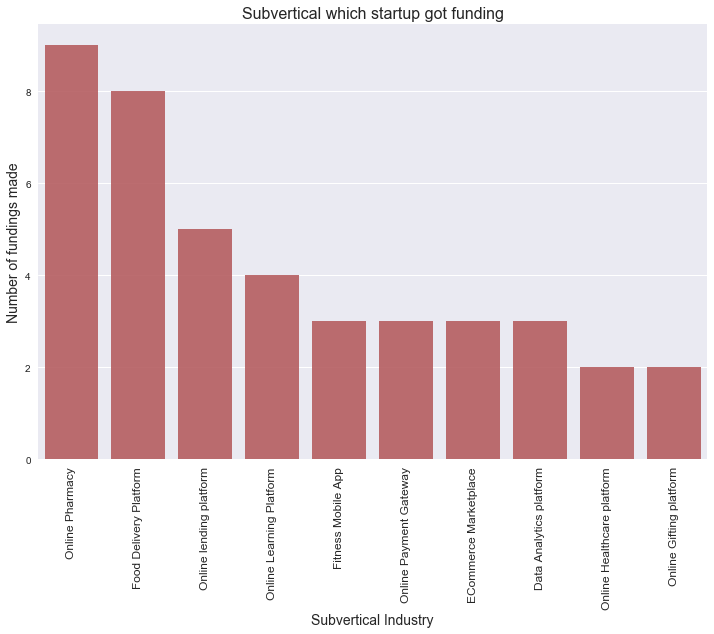

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=subvertical.index,y=subvertical.values,color=color[2],alpha=0.9)
plt.xticks(rotation='vertical',fontsize=12)
plt.xlabel('Subvertical Industry', fontsize=14)
plt.ylabel('Number of fundings made', fontsize=14)
plt.title("Subvertical which startup got funding", fontsize=16)
plt.show()

In Subcategory we see that Online pharmacy gets more funding followed by food delivery platform

### City which has maximum number of startups

In [28]:
city =startup["CityLocation"].value_counts().head(10)                                 

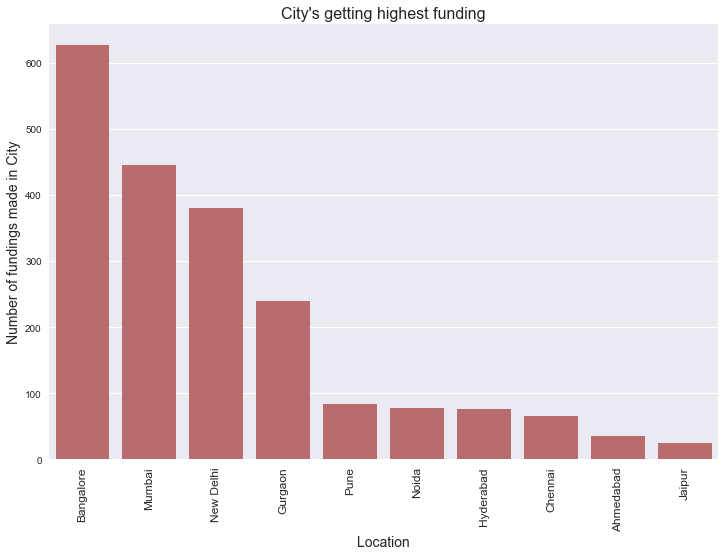

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x=city.index,y=city.values,color=color[2],alpha=0.9)
plt.xticks(rotation='vertical',fontsize=12)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of fundings made in City', fontsize=14)
plt.title("City's getting highest funding", fontsize=16)
plt.show()

As seen above banglore has more number of startups followed by mumbai

### Distribution of Startups accross top 20 cities

In [30]:
startup['CityLocation'].value_counts().head(10)

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

Text(0.5,1,'Distribution of Startups across Top cities')

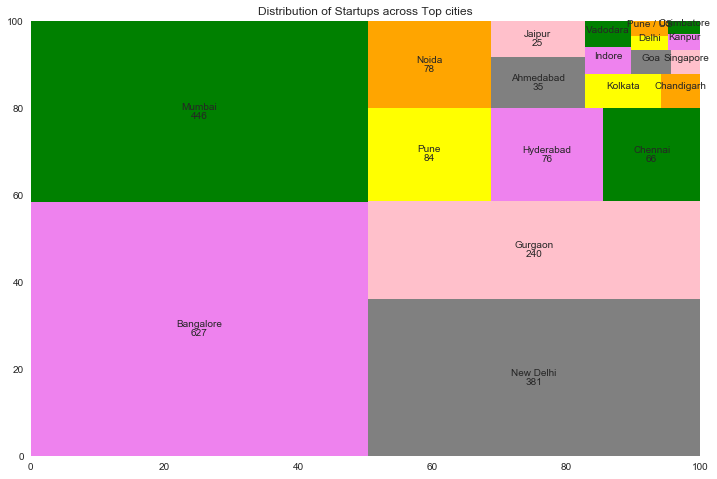

In [31]:
plt.figure(figsize=(12,8))
count = startup['CityLocation'].value_counts().head(20)
squarify.plot(sizes=count.values,label=count.index, value=city.values,color=["violet","green","grey","pink","yellow","orange"])
plt.title('Distribution of Startups across Top cities')

In [32]:
#from wordcloud import WordCloud
#names = startup["InvestorsName"][~pd.isnull(startup["InvestorsName"])]
#print(names)
#wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
#plt.figure(figsize=(15,8))
#plt.imshow(wordcloud)
#plt.title("Wordcloud for Investor Names", fontsize=35)
#plt.axis("off")
#plt.show()

### Who funded most for Startups

In [33]:
startup['InvestorsName'][startup['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
startup['InvestorsName'][startup['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
startup['InvestorsName'][startup['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
startup['InvestorsName'][startup['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
startup['InvestorsName'][startup['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
startup['InvestorsName'][startup['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'

Undisclosed Investors       99
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
Brand Capital               10
RoundGlass Partners         10
SAIF Partners                9
Accel Partners               9
Name: InvestorsName, dtype: int64


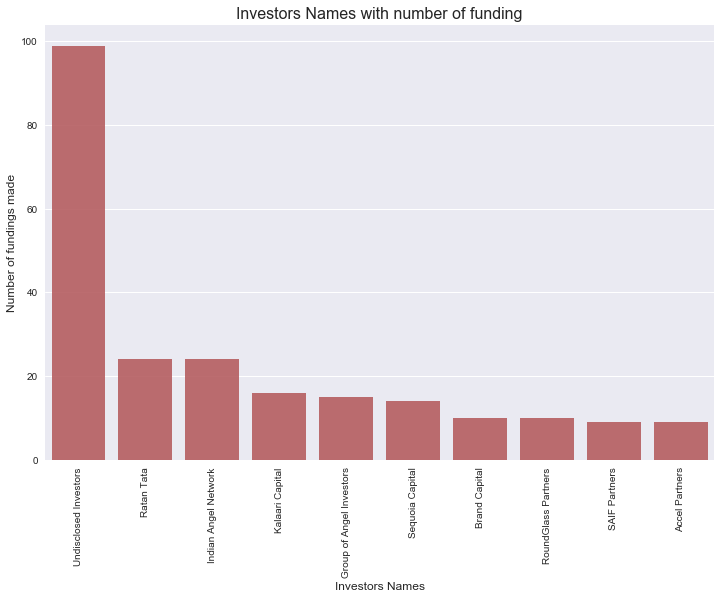

In [34]:
investors = startup['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(12,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[2])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

We can see that there are some undisclosed investors, but we can see that Ratan tata and Indian Angle Network are few top investors who believe in startup 

### Different types of fundings

In [35]:
startup["InvestmentType"].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Crowd Funding        1
PrivateEquity        1
Debt Funding         1
Crowd funding        1
Name: InvestmentType, dtype: int64

In [36]:
startup["InvestmentType"][startup["InvestmentType"]=='SeedFunding'] = 'Seed Funding'
startup["InvestmentType"][startup["InvestmentType"]=='Crowd funding'] = 'Crowd Funding'
startup["InvestmentType"][startup["InvestmentType"]=='PrivateEquity'] = 'Private Equity'

In [37]:
startup["InvestmentType"].value_counts()

Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: InvestmentType, dtype: int64

Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: InvestmentType, dtype: int64


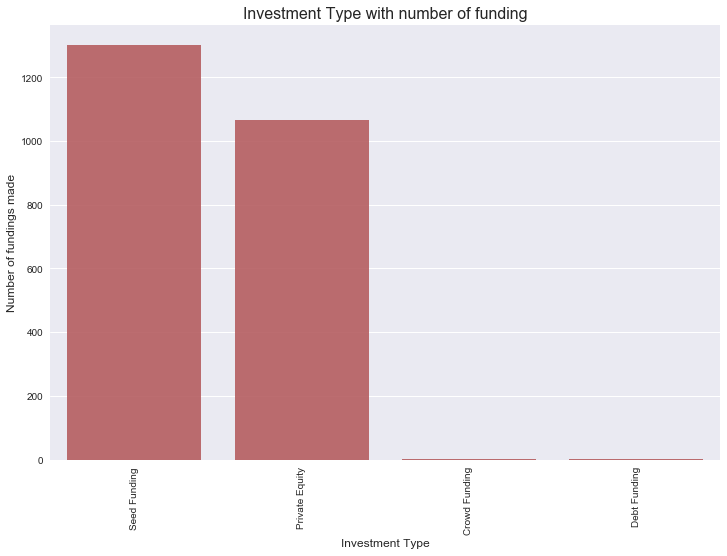

In [38]:
investment = startup['InvestmentType'].value_counts()
print(investment)
plt.figure(figsize=(12,8))
sns.barplot(investment.index, investment.values, alpha=0.9, color=color[2])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

Seed Funding and Private Equity are the top types of Funding

In [39]:
temp = startup["InvestmentType"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

In [40]:
startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,201708
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,201708
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,201708
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,201708
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,201708


In [41]:
startup1=startup.copy()

In [42]:
startup1['Date']=pd.to_datetime(startup1['Date'],format ='%d/%m/%Y')

In [43]:
startup1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,201708
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,201708
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,201708
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,201708
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,201708


### Time Series Analysis

In [44]:
startup1 = startup1.set_index('Date')

In [45]:
del startup1['SNo']

In [46]:
startup1.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
Date,,,,,,,,
2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,201708
2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,201708
2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,201708
2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,201708
2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,201708


In [47]:
round(startup1['2017']['AmountInUSD'].sum())

5846275500

In [48]:
round(startup1['2016']['AmountInUSD'].sum())

3828088608

In [49]:
round(startup1['2015']['AmountInUSD'].sum())

8673022368

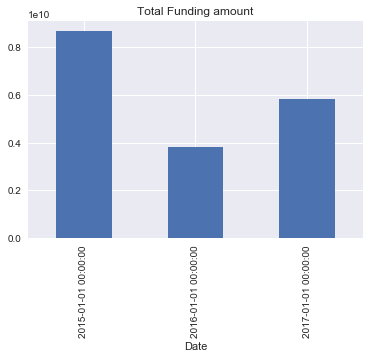

In [50]:
plt.title('Total Funding amount')
startup1.resample('AS')['AmountInUSD'].sum().plot.bar()

### Average Year-Start-wise graph for investment in period between January-2015 to Jan-2017 

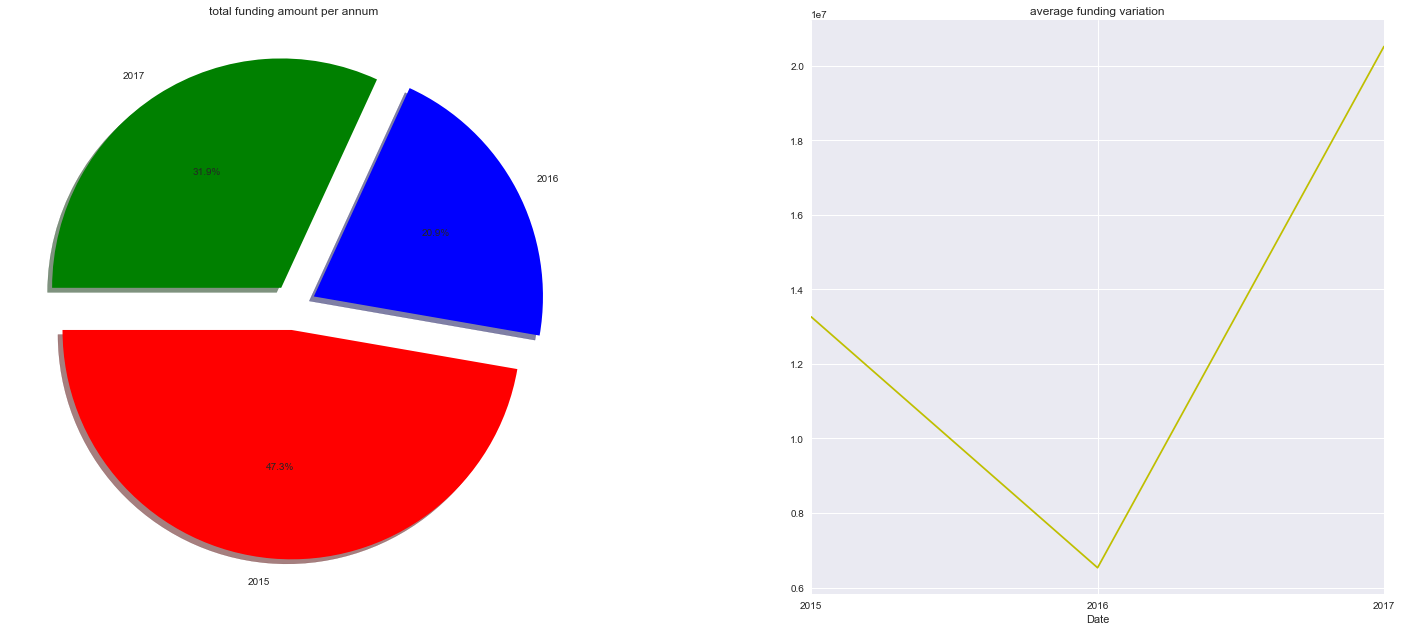

In [51]:
q=startup1['AmountInUSD'].resample('AS').mean()
a=startup1['AmountInUSD'].resample('AS').sum()
fig,ax=plt.subplots(nrows=1,ncols=2)

fig.tight_layout(pad=3) # Or equivalently,  "plt.tight_layout()"
fig.set_figheight(11)
fig.set_figwidth(24)

explode = (0.1, 0.1, 0.1)
ax[0].pie(a,autopct='%1.1f%%',shadow=True,startangle=180,explode=explode,colors=['red','blue','green'],labels=['2015','2016','2017'])
ax[0].set_title('total funding amount per annum')

q.plot(color='y',ax=ax[1])
ax[1].set_title('average funding variation')
plt.show()

In [52]:
startup['AmountInUSD'].fillna(np.mean(startup['AmountInUSD']), inplace = True)

### Total variation of funding amount per month in period of 2015-17

Text(0.5,1,'Funding Variation Per Month')

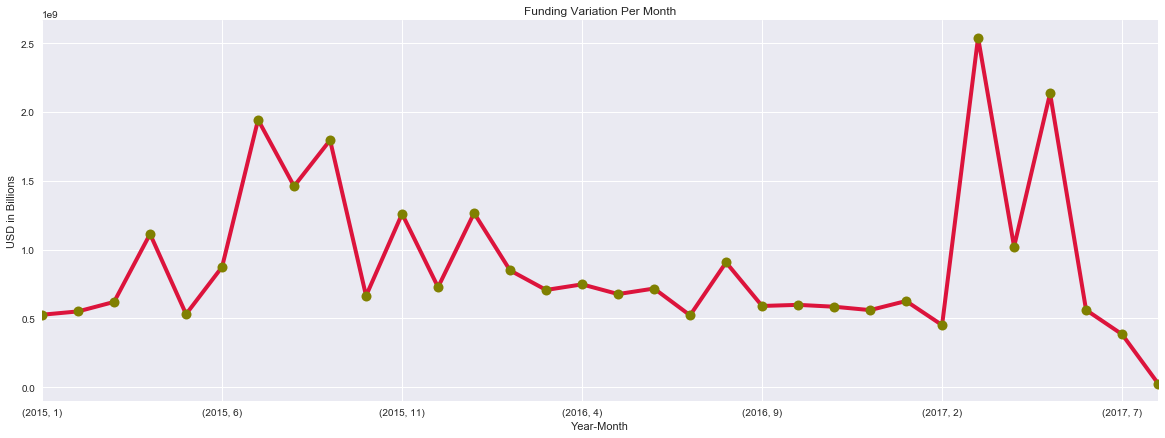

In [53]:
startup['Date']=pd.to_datetime(startup['Date'],format ='%d/%m/%Y')
#del startup['SNo']
fig =plt.figure(figsize=(20,7))
fig.set_figheight
ts_month = startup.groupby([startup['Date'].dt.year, startup['Date'].dt.month]).agg({'AmountInUSD':'sum'})['AmountInUSD']
ts_month.plot(linewidth=4, color='crimson',marker="o", markersize=10, markerfacecolor='olive')
plt.ylabel('USD in Billions')
plt.xlabel('Year-Month');
plt.title('Funding Variation Per Month')

In [54]:
startup['Date']=pd.to_datetime(startup['Date'],format ='%d/%m/%Y')

### Insights of 2015

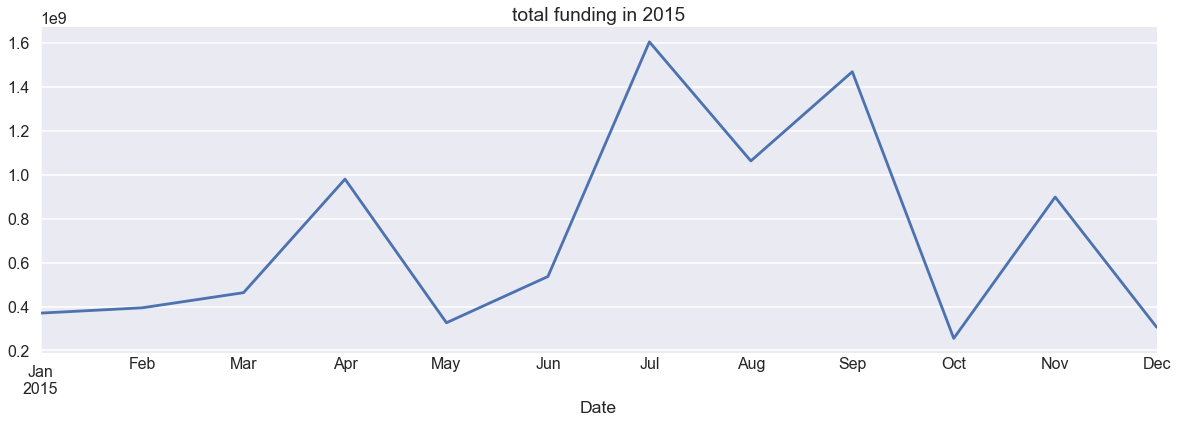

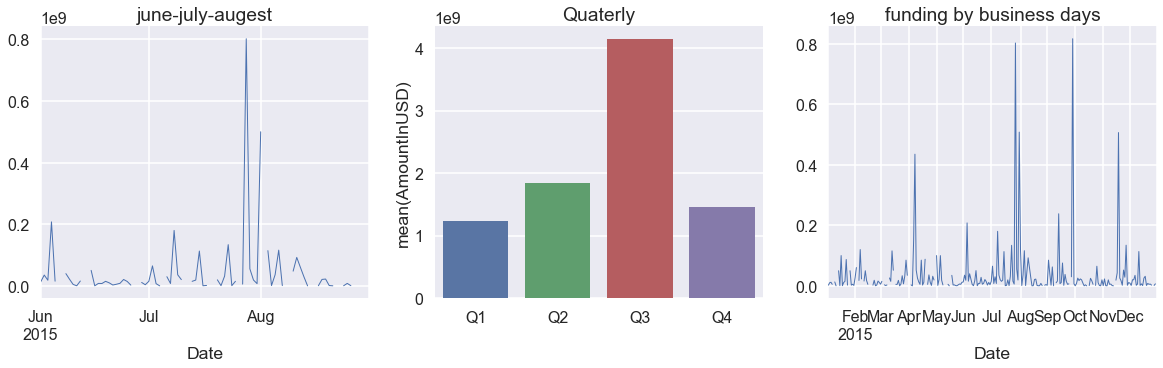

In [55]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(20,6))


a=startup1['2015'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2015')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=startup1['2015-06':'2015-8'].resample('d')['AmountInUSD'].sum().plot(ax=axes[0],lw=1)
a1.set_title('june-july-augest')

a2=sns.barplot(data=startup1['2015'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=startup1['2015'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('funding by business days')



plt.show()

### Insight of 2016

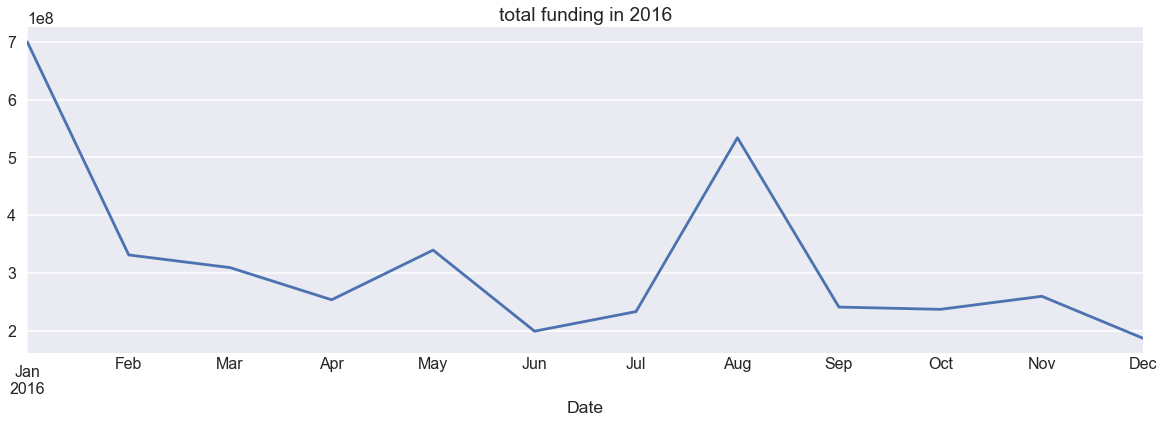

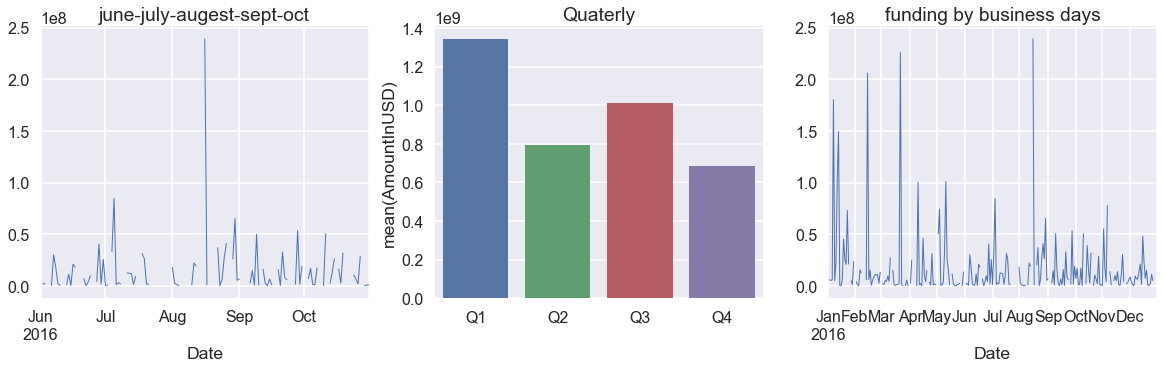

In [56]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(20,6))


a=startup1['2016'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2016')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=startup1['2016-06':'2016-10'].resample('d')['AmountInUSD'].sum().plot(ax=axes[0],lw=1)
a1.set_title('june-july-augest-sept-oct')

a2=sns.barplot(data=startup1['2016'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=startup1['2016'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('funding by business days')



plt.show()

### Insight of 2017

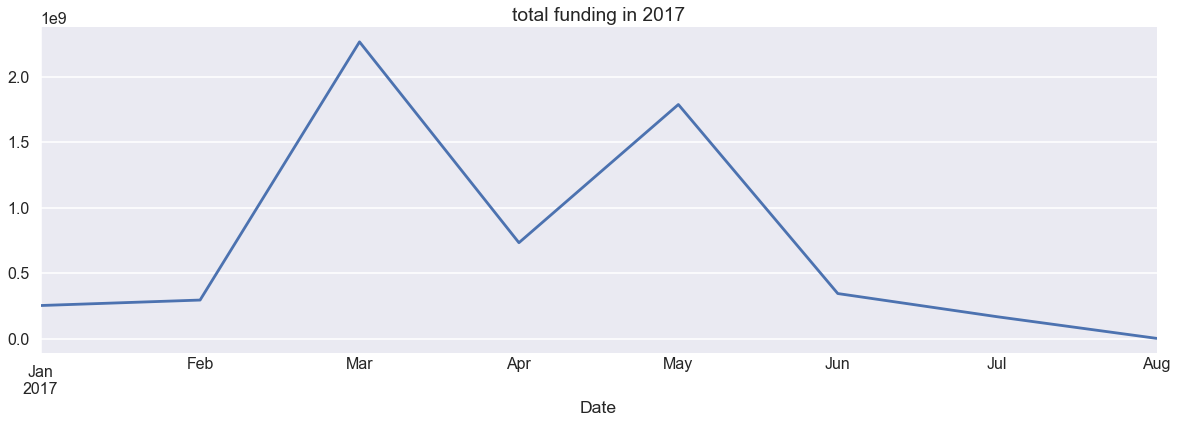

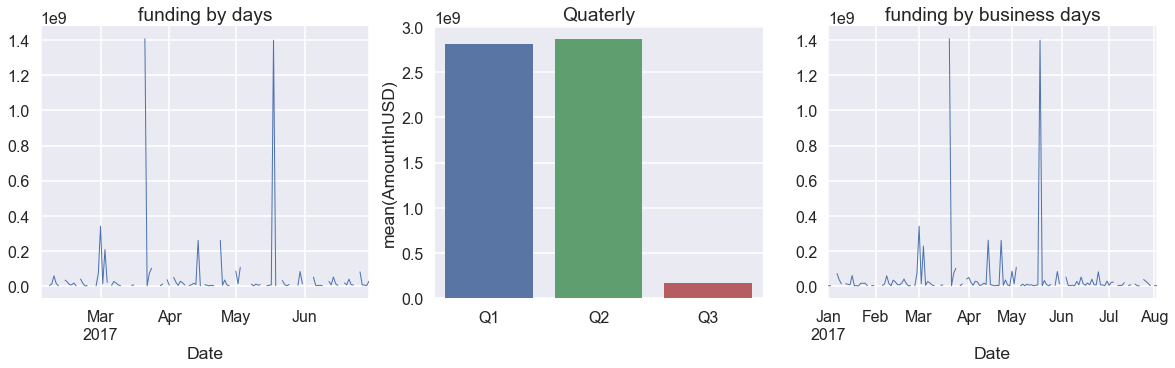

In [57]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(20,6))


a=startup1['2017'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2017')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=startup1['2017-02':'2017-6'].resample('d')['AmountInUSD'].sum().plot(ax=axes[0],lw=1)
a1.set_title('funding by days')

a2=sns.barplot(data=startup1['2017'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3'],ax=axes[1])
a2.set_title('Quaterly')
a3=startup1['2017'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('funding by business days')



plt.show()